In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [0]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    return X, t

In [0]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS
    t = []
    for i in range(len(t_indices)):
        temp = [0.0 for j in range(N)]
        temp[t_indices[i]] = 1.0
        t.append(np.array(temp))
    t_1hot = np.array(t)
    return t_1hot

In [4]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

Test passed 👍


In [0]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train = X
    t_train = t
    test = np.int_(testFraction*(np.size(X,0)))
    ntest = np.sort(np.array(np.random.choice(np.size(X,0)-1, test, replace=False)))
    X_test = []
    t_test = []
    for i in range(len(ntest)):
        X_test.append(X_train[ntest[i]-i])
        t_test.append(t_train[ntest[i]-i])
        t_train = np.delete(t_train,ntest[i]-i,0)
        X_train = np.delete(X_train,ntest[i]-i,0)
    t_test = np.array(t_test)
    X_test = np.array(X_test)
    return X_train, t_train, X_test, t_test

In [6]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [0]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train_normalized = (X_train - np.mean(X_train, axis = 0))/(np.std(X_train,axis = 0))
    X_test_normalized = (X_test - np.mean(X_train, axis = 0))/(np.std(X_train,axis = 0))
    return X_train_normalized, X_test_normalized

In [8]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3., 3., 3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [0]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = 1/(1 + np.exp(-x))
    return y

In [10]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

Test passed 👍


In [0]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = (np.exp(x))/(np.sum(np.exp(x)))
    return y

In [12]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

Test passed 👍


In [0]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = (x)*(1-x)
    return y

In [0]:
class NeuralNetwork:
    def __init__(self, ni, nh, no):
        '''   
        Input:
            ni: int, size of input layer
            nh: int, size of hidden layer
            no: int, size of output layer
        Action:
            Creates instance variables
        NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        self.ni = ni
        self.nh = nh
        self.no = no
        self.weights1 = []
        self.weights2 = []
        return
    
    def init_weights(self):
        '''
        Action:
            Randomly initialize weights1 and weights2 with proper size random np arrays
        '''

        ### WRITE YOUR CODE HERE - 2 MARKS
        self.weights1 = np.random.rand(self.nh,self.ni+1)
        self.weights2 = np.random.rand(self.no,self.nh+1)
    
    def predict(self, x):
        x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        return v2

    def backprop(self,x,y,eta):
        '''
        # application of the chain rule to find derivative of the categorical cross entropy loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
            # Finding the derivatives
            del_weights2: np array that stores the derivative of the loss function with respect to weights2
            del_weights1: np array that stores the derivative of the loss function with respect to weights1

            # Update the weights with the derivative of the categorical cross entropy loss function
              weights1 += eta*del_weights1
              weights2 += eta*del_weights2
        ''' 

        ### WRITE YOUR CODE HERE - 5 MARKS
        x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        x = np.reshape(x,(np.size(x),1))
        h1 = self.weights1.dot(x)
        v1i = sigmoid(h1)
        v1i = np.reshape(v1i,(np.size(v1i),1))
        v1f = np.insert(v1i,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1f)
        v2 = softmax(h2)
        v2 = np.reshape(v2, (np.size(v2),1))
        y = np.reshape(y, (np.size(y),1))
        
        del_weights2 = (y - v2)*(v1f.T)
        
        del_weights1 = ((np.transpose(np.delete(self.weights2,0,1))).dot(y-v2))*v1i*(1-v1i)*(np.transpose(x))
        
        self.weights1 += eta*del_weights1
        self.weights2 += eta*del_weights2
        return -np.sum((y)*(np.log(v2)))

    def fit(self, X, t, eta, epochs):
        '''
        input:
            X: training input data 
            t: training targets
            eta: learning rate
            epochs: number of epochs
        Action:
            train the weights
        '''

        ### WRITE YOUR CODE HERE - 5 MARKS
        loss = []
        temp = 0
        index = 0
        ind = np.arange(np.size(X,0))
        np.random.shuffle(ind)
        for i in range(epochs):
            for j in ind:
                temp += self.backprop(np.transpose(X[j]),np.transpose(t[j]),eta)
                index +=1
            loss.append(temp/index)
            temp = 0
        plt.plot(loss)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Loss")
        
    def predict_label(self,x):    
        '''
        Output:
            y: np array of index
        '''

        ### WRITE YOUR CODE HERE - 1 MARKS
        y = []
        Y = self.predict(x)
        for i in range(np.size(Y,axis=1)):
            y.append(np.argmax(Y[:,i]))
        y = np.array(y)
        return y

In [0]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    n = np.size(np.unique(t))
    CM = np.zeros((n,n))
    for i in range(len(t)):
        CM[t[i],y[i]]+=1
    accuracy = ((np.sum(np.diagonal(CM)))/(np.sum(CM)))*100
    print("Accuracy = ",accuracy)
    print(CM)
    return CM

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

Accuracy =  90.0
[[ 5.  0.  0.]
 [ 0. 14.  2.]
 [ 0.  1.  8.]]


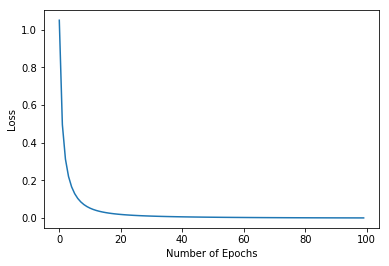

In [16]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,t = loadIrisData()
    X_train, t_train, X_test, t_test = splitData(X,t,0.2)
    X_train,X_test = normalizeX(X_train, X_test)
    N = NeuralNetwork(np.size(X,1),5,np.size(np.unique(t)))
    N.init_weights()
    N.fit(X_train,one_hot_encoding(t_train,np.size(np.unique(t))),0.01,100)
    y = N.predict_label(np.transpose(X_test))
    getCM(y,t_test)
    
if __name__=="__main__":
    experiment()